# Load Data and Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
df = pd.read_csv('DataForViz.csv')
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,little,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,little,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


# Label Encoding

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df.Sex = le.fit_transform(df.Sex)
df.Housing = le.fit_transform(df.Housing)
df['Saving accounts'] = le.fit_transform(df['Saving accounts'])
df['Checking account'] = le.fit_transform(df['Checking account'])
df.Purpose = le.fit_transform(df.Purpose)

# Correlation Heatmap

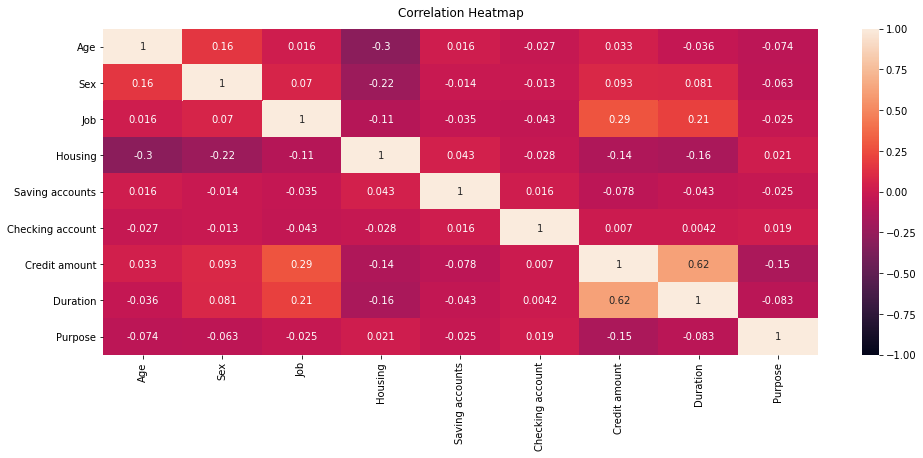

In [5]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# KMeans Clustering Model

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=10)
kmeans.fit(df.values)

KMeans(n_clusters=2, random_state=10)

In [7]:
df['cluster'] = kmeans.labels_
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,cluster
0,67,1,2,1,0,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,0,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,0
4,53,1,2,0,0,0,4870,24,1,1
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12,4,1
996,40,1,3,1,0,0,3857,30,1,1
997,38,1,2,1,0,0,804,12,5,1
998,23,1,2,0,0,0,1845,45,5,1


# Use PCA to Visualize Cluster Data

In [8]:
df2 = df.copy()
df2 = df2.iloc[:,:-1]
df2

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,0,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,0,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1
...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12,4
996,40,1,3,1,0,0,3857,30,1
997,38,1,2,1,0,0,804,12,5
998,23,1,2,0,0,0,1845,45,5


In [9]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(df2)
pcs = pca.transform(df2)

data_pca = pd.DataFrame(data = pcs, columns = ['PC_1', 'PC_2'])
data_pca['clusters'] = kmeans.labels_
data_pca

,PC_1,PC_2,clusters
0,-2102.286319,32.863167,1
1,2679.802746,-17.313851,0
2,-1175.275846,14.428864,1
3,4610.782988,7.101043,0
4,1598.747090,17.203552,1
...,...,...,...
995,-1535.277052,-3.415561,1
996,585.765064,2.964738,1
997,-2467.272815,3.132902,1
998,-1426.190387,-17.212779,1


<AxesSubplot:xlabel='PC_1', ylabel='PC_2'>

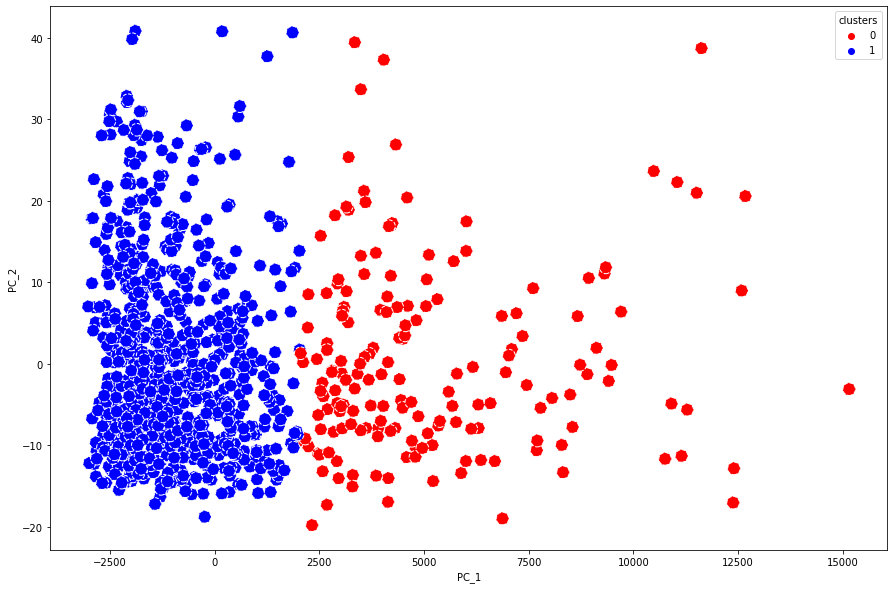

In [10]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC_1", y="PC_2",
    hue="clusters",
    #edgecolor='green',
    linestyle='--',
    data=data_pca,
    palette=['red','blue'],
    s=160,
    ax=ax
)

# Visualization by Credit Amount vs Duration

<AxesSubplot:xlabel='Credit amount', ylabel='Duration'>

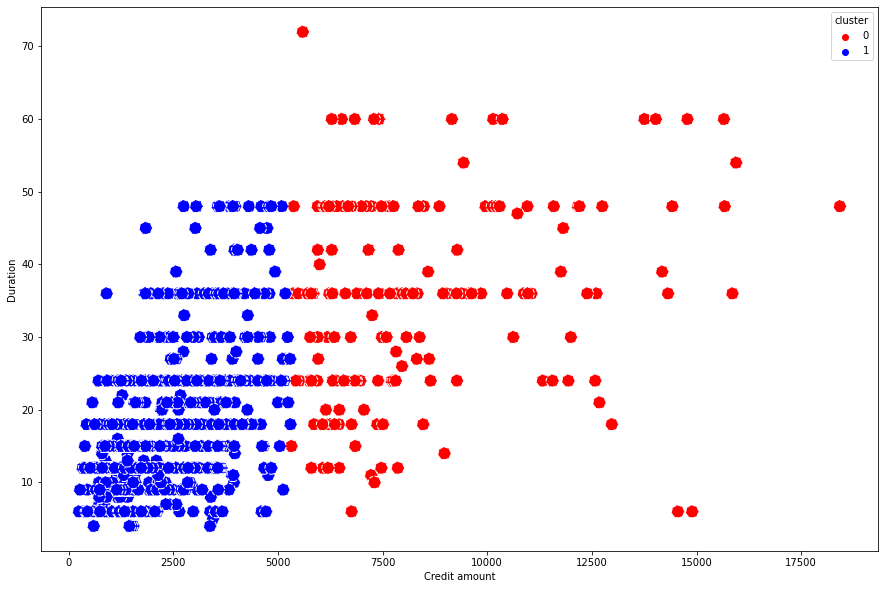

In [15]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="Credit amount", y="Duration",
    hue="cluster",
    #edgecolor='green',
    linestyle='--',
    data=df,
    palette=['red','blue'],
    s=160,
    ax=ax
)

From visualization in above, we can conclude that: 
- the customers who have label "1" (Blue dot) is clustered as Good Credit Risk. 
- the customers who have label "0" (Red dot) is clustered as Bad Credit Risk

# Evaluation Clustering Model with Silhouette Score

In [13]:
from sklearn.metrics import silhouette_score
for n_clusters in range (2, 11):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.7222421892396983)
For n_clusters = 3, silhouette score is 0.6478640136172132)
For n_clusters = 4, silhouette score is 0.611758698068799)
For n_clusters = 5, silhouette score is 0.5831011152583939)
For n_clusters = 6, silhouette score is 0.578277798752823)
For n_clusters = 7, silhouette score is 0.5777284957032535)
For n_clusters = 8, silhouette score is 0.5709580319874692)
For n_clusters = 9, silhouette score is 0.5600495502223221)
For n_clusters = 10, silhouette score is 0.5172320444523071)


From Silhouette score in above, if we cluster the customers with 2 clusters, we have good evaluation score, i.e. 0.72. It indicates that the customers who have Good Credit Risk and Bad Credit Risk are separated perfectly

# Detailed of Clustered Customer

In [16]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,cluster
0,67,1,2,1,0,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,0,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,0
4,53,1,2,0,0,0,4870,24,1,1
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12,4,1
996,40,1,3,1,0,0,3857,30,1,1
997,38,1,2,1,0,0,804,12,5,1
998,23,1,2,0,0,0,1845,45,5,1


In [18]:
df['cluster'].value_counts()

1    827
0    173
Name: cluster, dtype: int64

## Correlation Heatmap

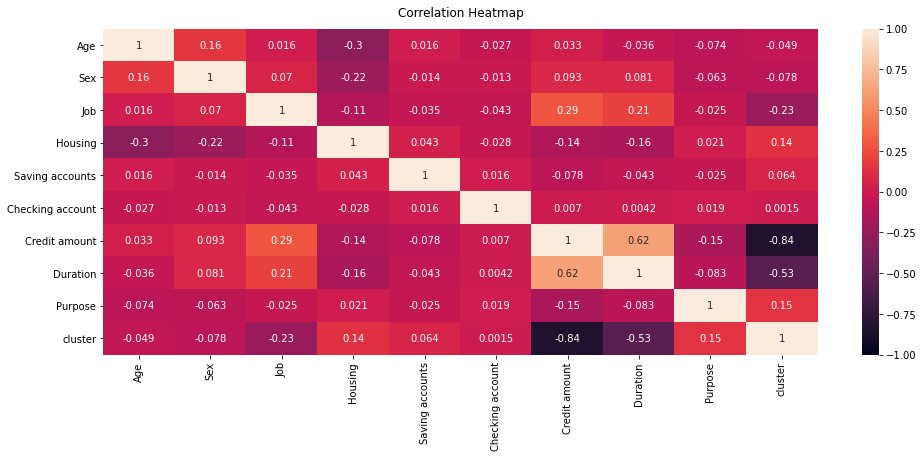

In [19]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

From Correlation Heatmap in above, we can conclude that :
1. Credit amount has highly negative correlation to the cluster
2. Duration has moderately negative correlation to the cluster
3. The rest features has low negative/positive correlation to the cluster


In [23]:
df['Credit_Risk'] = df['cluster'].map({1:'Good', 0:'Bad'})

In [25]:
df = df.drop(['cluster'],axis=1)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit_Risk
0,67,1,2,1,0,0,1169,6,5,Good
1,22,0,2,1,0,1,5951,48,5,Bad
2,49,1,1,1,0,0,2096,12,3,Good
3,45,1,2,0,0,0,7882,42,4,Bad
4,53,1,2,0,0,0,4870,24,1,Good
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12,4,Good
996,40,1,3,1,0,0,3857,30,1,Good
997,38,1,2,1,0,0,804,12,5,Good
998,23,1,2,0,0,0,1845,45,5,Good


In [26]:
df.to_csv('dfClustered.csv',index=False)